In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import importlib
import data_acquisition
importlib.reload(data_acquisition)

<module 'data_acquisition' from 'C:\\Users\\Johanna\\Documents\\Schweden\\PublicTransportProject\\PT-Project\\data_acquisition.py'>

C:\Users\Johanna\Documents\Schweden\PublicTransportProject\PT-Project\data_acquisition.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annoying['stop_sequence_real'] = df_annoying.apply(
C:\Users\Johanna\Documents\Schweden\PublicTransportProject\PT-Project\data_acquisition.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_annoying['stop_headsign'] = df_annoying['stop_headsign'].apply(


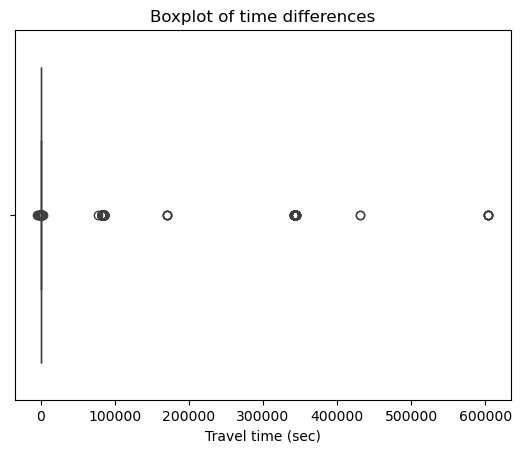

2463

In [49]:
df = data_acquisition.my_read_df("full_dataset.csv")
sns.boxplot(x=df['travel_time'].dropna())
plt.xlabel('Travel time (sec)')
#plt.xlim(0,1000)
#Inspection of the travel times
plt.title('Boxplot of time differences')
plt.show()
df_outliers=df[df["travel_time"]>1200]
len(df_outliers)

In [50]:
df.columns

Index(['trip_id', 'stop_id', 'route_short_name', 'stop_name', 'stop_headsign',
       'stop_sequence_real', 'arrival_time_real', 'departure_time_real',
       'arrival_delay', 'departure_delay', 'departure_time_sched',
       'arrival_time_sched', 'service_id', 'start_date', 'shape_dist_traveled',
       'stop_lat', 'stop_lon', 'distance_between_stops', 'prev_departure_real',
       'travel_time', 'speed', 'dwell_time'],
      dtype='object')

In [51]:
df.loc[df['stop_headsign'] == "Ruddammen", 'destination'] = "Ruddammen"
df.loc[df['stop_headsign'] == "Hornsberg", 'destination'] = "Hornsberg"
df.loc[df['stop_headsign'] == "Henriksdalsberget", 'destination'] = "Henriksdalsberget"
df.loc[df['stop_headsign'] == "Karolinska institutet", 'destination'] = "Karolinska institutet"
#df.loc[df['stop_headsign'] == "Hornsberg via Södersjukhuset", 'destination'] = "Hornsberg"
df.loc[df['stop_headsign'] == "Sickla udde", 'destination'] = "Sickla udde"
#df.loc[df['stop_headsign'] == "Sickla udde via Södersjukhuset", 'destination'] = "Sickla udde"

In [52]:
df.columns

Index(['trip_id', 'stop_id', 'route_short_name', 'stop_name', 'stop_headsign',
       'stop_sequence_real', 'arrival_time_real', 'departure_time_real',
       'arrival_delay', 'departure_delay', 'departure_time_sched',
       'arrival_time_sched', 'service_id', 'start_date', 'shape_dist_traveled',
       'stop_lat', 'stop_lon', 'distance_between_stops', 'prev_departure_real',
       'travel_time', 'speed', 'dwell_time', 'destination'],
      dtype='object')

# Export of coordinates for usage in ArcGIS

In [54]:
df_coords = df[['route_short_name', 'destination', 'stop_sequence_real', 'stop_lat', 'stop_lon']].drop_duplicates()
print(len(df_coords))
#dupes = df_coords[df_coords.duplicated(subset=['route_short_name', 'stop_headsign', 'stop_sequence_sched'], keep=False)]
#dupes = dupes.sort_values(['route_short_name', 'stop_headsign', 'stop_sequence_sched'])

#dupes[['route_short_name', 'stop_headsign', 'stop_sequence_sched', 'stop_lat', 'stop_lon']]

143


In [55]:
df_coords[(df_coords['route_short_name']==61) & (df_coords['destination']=="Hornsberg")].sort_values(by='stop_sequence_real').to_csv("coordinates_61_Hornsberg.csv", index=False, encoding='utf-8')


In [56]:
df_coords[(df_coords['route_short_name']==61) & (df_coords['destination']=="Ruddammen")].sort_values(by='stop_sequence_real').to_csv("coordinates_61_Ruddammen.csv", index=False, encoding='utf-8')


In [57]:
df_coords[(df_coords['route_short_name']==53) & (df_coords['destination']=="Henriksdalsberget")].sort_values(by='stop_sequence_real').to_csv("coordinates_53_Heriksdalsberget.csv", index=False, encoding='utf-8')


In [58]:
df_coords[(df_coords['route_short_name']==53) & (df_coords['destination']=="Karolinska institutet")].sort_values(by='stop_sequence_real').to_csv("coordinates_53_Karolinska.csv", index=False, encoding='utf-8')


In [63]:
df_coords[(df_coords['route_short_name']==74) & (df_coords['destination']=="Hornsberg")].sort_values(by='stop_sequence_real').to_csv("coordinates_74_Hornsberg.csv", index=False, encoding='utf-8')


In [475]:
df_coords[(df_coords['route_short_name']==74) & (df_coords['destination']=="Sickla udde")].sort_values(by='stop_sequence_real').to_csv("coordinates_74_Sickla.csv", index=False, encoding='utf-8')


# Computation of average speed (peak hours) for usage in ArcGIS

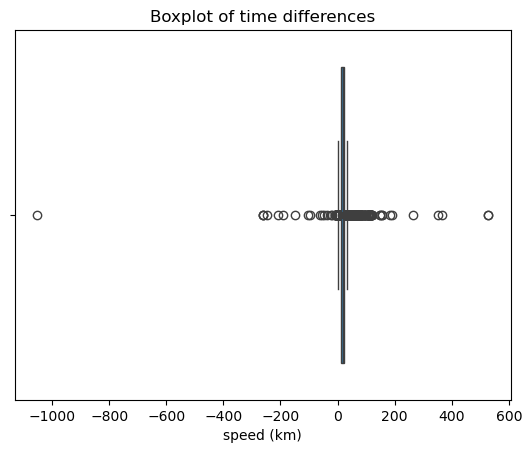

66710


2535

In [70]:
sns.boxplot(x=df['speed'].dropna())
plt.xlabel('speed (km)')
#plt.xlim(0,1000)
plt.title('Boxplot of time differences')
plt.show()
df_outliers_speed = df[(abs(df["speed"]) > 100) | (df["speed"] < 0)]
print(len(df))
len(df_outliers_speed)

In [72]:
df_speed=df[(abs(df["speed"]) <= 100) & (df["speed"] >= 0)]
len(df_speed)

63776

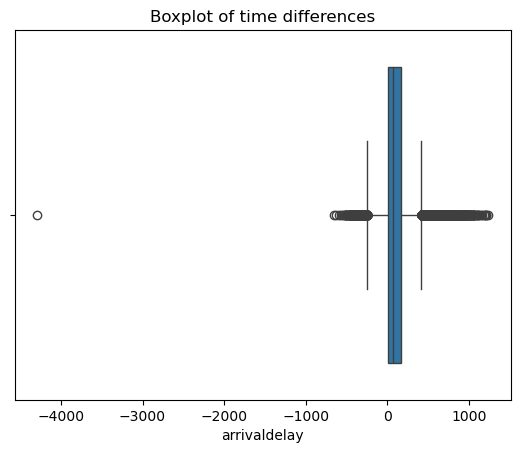

In [74]:
sns.boxplot(x=df_speed['arrival_delay'].dropna())
plt.xlabel('arrivaldelay')
#plt.xlim(0,1000)
plt.title('Boxplot of time differences')
plt.show()
#df_outliers_speed = df[(abs(df["arrival_delay"]) > 1000) | (df["speed"] < 0)]
#print(len(df))
#len(df_outliers_speed)

In [76]:
df_average=pd.DataFrame(columns=['route_short_name', 'destination', 'stop_sequence_real', 'average_speed', 'average_speed_7-9', 'average_speed_79_1518', 'average_speed_non_79','average_speed_non79_1518','average_arrivaldelay', 'average_arrivaldelay_79_1518'])
for line in df_speed['route_short_name'].unique():
  for dest in df_speed['destination'].unique():
    if df_speed.loc[(df_speed['route_short_name']==line)&(df_speed['destination']==dest)].empty :
      continue
    d=[] #average speed whole day
    e=[] #average speed 7-9
    f=[] #average speed 7-9 and 15-18
    g=[] #average speed non-peak (non 7-9)
    h=[] #average speed non-peak (non 7-9, non 15-18)
    i=[]#arrival delay (whole day)
    j=[]#arrival delay (7-9 and 15-18'
    for stop in sorted(df_speed.loc[(df_speed['route_short_name']==line) & (df_speed['destination']==dest)]['stop_sequence_real'].unique()):
        d=df_speed.loc[(df_speed['stop_sequence_real']==stop) & (df_speed['route_short_name']==line) & (df_speed['destination']==dest) ]['speed'].values
        e=df_speed.loc[(df_speed['stop_sequence_real']==stop) & (df_speed['route_short_name']==line) & (df_speed['destination']==dest) &(df['arrival_time_real'].dt.hour >= 7) &(df['arrival_time_real'].dt.hour <9)]['speed'].values
        f=df_speed.loc[(df_speed['stop_sequence_real']==stop) & (df_speed['route_short_name']==line) & (df_speed['destination']==dest) &(((df['arrival_time_real'].dt.hour >= 7) &(df['arrival_time_real'].dt.hour <9))|((df['arrival_time_real'].dt.hour >= 15) &(df['arrival_time_real'].dt.hour <18)))]['speed'].values
        g=df_speed.loc[(df_speed['stop_sequence_real']==stop) & (df_speed['route_short_name']==line) & (df_speed['destination']==dest) &~((df['arrival_time_real'].dt.hour < 7) &(df['arrival_time_real'].dt.hour >=9))]['speed'].values
        h=df_speed.loc[(df_speed['stop_sequence_real']==stop) & (df_speed['route_short_name']==line) & (df_speed['destination']==dest) &~(((df['arrival_time_real'].dt.hour >= 7) &(df['arrival_time_real'].dt.hour <9))|((df['arrival_time_real'].dt.hour >= 15) &(df['arrival_time_real'].dt.hour <18)))]['speed'].values
        i=df_speed.loc[(df_speed['stop_sequence_real']==stop) & (df_speed['route_short_name']==line) & (df_speed['destination']==dest) ]['arrival_delay'].values
        j=df_speed.loc[(df_speed['stop_sequence_real']==stop) & (df_speed['route_short_name']==line) & (df_speed['destination']==dest) &(((df['arrival_time_real'].dt.hour >= 7) &(df['arrival_time_real'].dt.hour <9))|((df['arrival_time_real'].dt.hour >= 15) &(df['arrival_time_real'].dt.hour <18)))]['arrival_delay'].values       
        average_speed = pd.Series(d).mean()
        average_speed_79=pd.Series(e).mean()
        average_speed_79_1518=pd.Series(f).mean()
        average_speed_non_79=pd.Series(g).mean()
        average_speed_non_79_1518=pd.Series(h).mean()
        average_arrivaldelay=pd.Series(i).mean()
        average_arrivaldelay_79_1518=pd.Series(j).mean()
        df_average.loc[len(df_average)] = [line, dest, stop, average_speed, average_speed_79, average_speed_79_1518, average_speed_non_79, average_speed_non_79_1518, average_arrivaldelay,average_arrivaldelay_79_1518]
print(len(df_average))
df_average.head()

137


,route_short_name,destination,stop_sequence_real,average_speed,average_speed_7-9,average_speed_79_1518,average_speed_non_79,average_speed_non79_1518,average_arrivaldelay,average_arrivaldelay_79_1518
0,74,Sickla udde,2,14.555448,14.258215,14.180123,14.555448,14.924412,5.794872,16.491379
1,74,Sickla udde,3,15.469889,14.901255,13.943488,15.469889,16.976886,53.641791,76.287554
2,74,Sickla udde,4,15.663507,14.690472,14.736902,15.663507,16.551503,63.195745,86.886957
3,74,Sickla udde,5,17.504942,16.839161,16.870599,17.504942,18.063467,59.127119,83.262443
4,74,Sickla udde,6,38.023414,37.527023,37.436690,38.023414,38.533609,92.919662,118.727273


In [77]:
len(df_average)

137

In [82]:
df_average[(df_average['route_short_name']==74) & (df_average['destination']=="Sickla udde")].sort_values(by='stop_sequence_real').to_csv("average_speed_74_Sickla.csv", index=False, encoding='utf-8')


In [80]:
df_average[(df_average['route_short_name']==74) & (df_average['destination']=="Hornsberg")].sort_values(by='stop_sequence_real').to_csv("average_speed_74_Hornsberg.csv", index=False, encoding='utf-8')


In [84]:
df_average[(df_average['route_short_name']==53) & (df_average['destination']=="Karolinska institutet")].sort_values(by='stop_sequence_real').to_csv("average_speed_53_Karolinska.csv", index=False, encoding='utf-8')


In [86]:
df_average[(df_average['route_short_name']==53) & (df_average['destination']=="Henriksdalsberget")].sort_values(by='stop_sequence_real').to_csv("average_speed_53_Henriksdalsberget.csv", index=False, encoding='utf-8')


In [90]:
df_average[(df_average['route_short_name']==61) & (df_average['destination']=="Ruddammen")].sort_values(by='stop_sequence_real').to_csv("average_speed_61_Ruddammen.csv", index=False, encoding='utf-8')


In [92]:
df_average[(df_average['route_short_name']==61) & (df_average['destination']=="Hornsberg")].sort_values(by='stop_sequence_real').to_csv("average_speed_61_Hornsberg.csv", index=False, encoding='utf-8')


In [15]:
df_name=df[['route_short_name', 'destination', 'stop_sequence_real', 'stop_name']].drop_duplicates()

In [17]:
df_name[(df_name['route_short_name']==53) & (df_name['destination']=="Henriksdalsberget")].sort_values(by='stop_sequence_real').to_csv("busstop_names_53_Heriksdalsberget.csv", index=False, encoding='utf-8')


# Analysis on whole lines

In [80]:
#this  first part of the analysis on whole lines was later considered not interesting enough (cannot be found in the report)
overall_avg_speed=df_average.groupby(['route_short_name', 'destination'])['average_speed'].mean().mean()
overall_avg_speed_79_1518=df_average.groupby(['route_short_name', 'destination'])['average_speed_79_1518'].mean().mean()
overall_avg_arrivaldelay=df_average.groupby(['route_short_name', 'destination'])['average_arrivaldelay'].mean().mean()
overall_avg_arrivaldelay_79_1518=df_average.groupby(['route_short_name', 'destination'])['average_arrivaldelay_79_1518'].mean().mean()

#print(overall_avg_speed)
summary = df_average.groupby(['route_short_name', 'destination']).agg(
    total_segments=('average_speed', 'count'),
    above_avg_speed=('average_speed', lambda x: (x > overall_avg_speed).sum()),
    above_avg_speed_79_1518=('average_speed_79_1518', lambda x: (x > overall_avg_speed_79_1518).sum()),
    above_avg_arrivaldelay=('average_arrivaldelay', lambda x: (x < overall_avg_arrivaldelay).sum()),
    above_avg_arrivaldelay_79_1518=('average_arrivaldelay_79_1518', lambda x: (x < overall_avg_arrivaldelay_79_1518).sum())
)

summary['percent_above_avg_speed'] = (summary['above_avg_speed'] / summary['total_segments']) * 100
summary['percent_above_avg_speed_79_1518'] = (summary['above_avg_speed_79_1518'] / summary['total_segments']) * 100
summary['percent_above_avg_arrivaldelay'] = (summary['above_avg_arrivaldelay'] / summary['total_segments']) * 100
summary['percent_above_avg_arrivaldelay_79_1518'] = (summary['above_avg_arrivaldelay_79_1518'] / summary['total_segments']) * 100


summary['percentage_row'] = [28, 30,24,26,44,42]
print(summary)

                                        total_segments  above_avg_speed  \
route_short_name destination                                              
53               Henriksdalsberget                  21                9   
                 Karolinska institutet              21                7   
61               Hornsberg                          26               11   
                 Ruddammen                          28                8   
74               Hornsberg                          20               10   
                 Sickla udde                        21               11   

                                        above_avg_speed_79_1518  \
route_short_name destination                                      
53               Henriksdalsberget                            9   
                 Karolinska institutet                        6   
61               Hornsberg                                   11   
                 Ruddammen                                    9 

In [82]:
#PIR computation 

tolerance = 180
last_stops_df = df_coords.loc[
    df_coords.groupby(['route_short_name', 'destination'])['stop_sequence_real'].idxmax(),
    ['route_short_name', 'destination', 'stop_sequence_real']
]
df_last = df.merge(last_stops_df, on=['route_short_name', 'destination', 'stop_sequence_real'])
#print(df_last.head())

summary_PIR = df_last.groupby(['route_short_name', 'destination']).agg(
        total=('arrival_delay', 'count'),
         total_79_1518=('arrival_delay', lambda x: (((df_last.loc[x.index, 'arrival_time_real'].dt.hour >= 7) & (df_last.loc[x.index, 'arrival_time_real'].dt.hour < 9)) |
                                               ((df_last.loc[x.index, 'arrival_time_real'].dt.hour >= 15) & (df_last.loc[x.index, 'arrival_time_real'].dt.hour < 18))).sum()),
        reliable_79_1518=('arrival_delay', lambda x: (x[((df_last['arrival_time_real'].dt.hour >= 7) & (df_last['arrival_time_real'].dt.hour < 9)) | ((df_last['arrival_time_real'].dt.hour >= 15) & (df_last['arrival_time_real'].dt.hour < 18))] < tolerance).sum()),
        reliable=('arrival_delay', lambda x: (x < tolerance).sum())
    )

summary_PIR['PIR'] = (summary_PIR['reliable'] / summary_PIR['total']) * 100
summary_PIR['PIR_79_1518']=(summary_PIR['reliable_79_1518'] / summary_PIR['total_79_1518']) * 100

print(summary_PIR)

                                        total  total_79_1518  \
route_short_name destination                                   
53               Henriksdalsberget        450            143   
                 Karolinska institutet    448            145   
61               Hornsberg                490            173   
                 Ruddammen                489            168   
74               Hornsberg                466            210   
                 Sickla udde              475            203   

                                        reliable_79_1518  reliable        PIR  \
route_short_name destination                                                    
53               Henriksdalsberget                   116       379  84.222222   
                 Karolinska institutet               107       369  82.366071   
61               Hornsberg                           169       476  97.142857   
                 Ruddammen                           162       471  96.319018   
7

In [84]:
merged_summary = pd.merge(summary_PIR, summary, on=['route_short_name', 'destination'], how='inner')

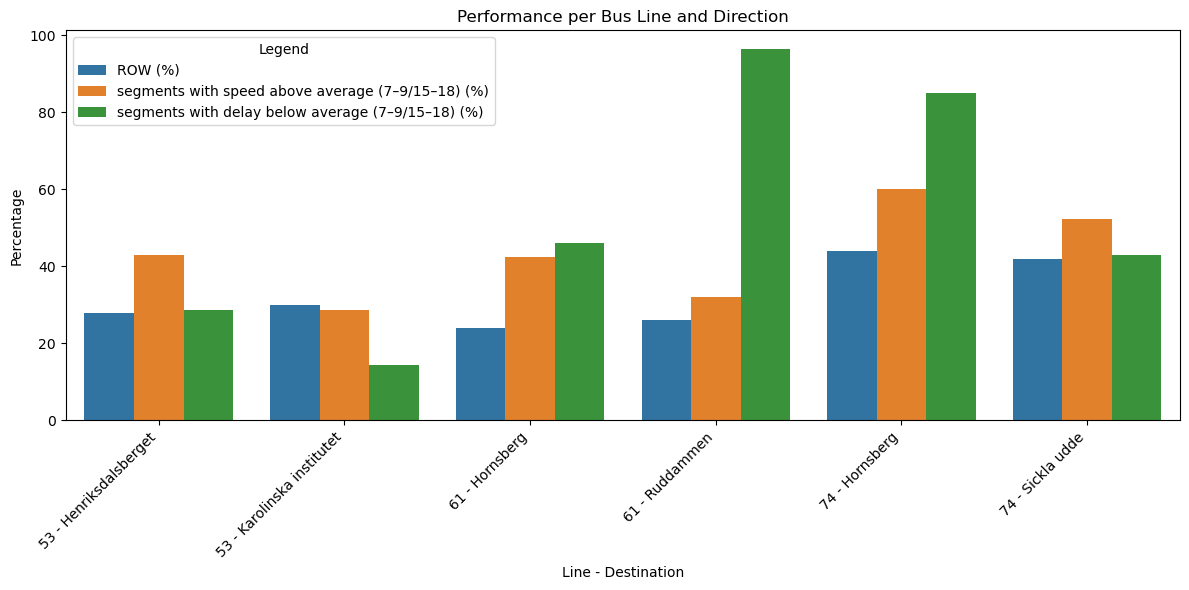

In [86]:
#figure not in the report
df_plot = merged_summary.reset_index()
cols_to_plot = [
    'percentage_row',
    #'PIR_79_1518',
    'percent_above_avg_speed_79_1518',
    'percent_above_avg_arrivaldelay_79_1518'
]


pretty_names = {
    'percentage_row': 'ROW (%)',
    #'PIR_79_1518': 'PIR (%)',
    'percent_above_avg_speed_79_1518': 'segments with speed above average (7–9/15–18) (%)',
    'percent_above_avg_arrivaldelay_79_1518': 'segments with delay below average (7–9/15–18) (%)'
}


df_melted = df_plot.melt(
    id_vars=['route_short_name', 'destination'],
    value_vars=cols_to_plot,
    var_name='Metric',
    value_name='Percentage'
)
df_melted['Metric'] = df_melted['Metric'].map(pretty_names)
df_melted['Line'] = df_melted['route_short_name'].astype(str) + ' - ' + df_melted['destination']

# Plot
plt.figure(figsize=(12,6))
sns.barplot(data=df_melted, x='Line', y='Percentage', hue='Metric')
plt.title("Performance per Bus Line and Direction")
plt.xticks(rotation=45, ha='right')
plt.ylabel("Percentage")
plt.xlabel("Line - Destination")
plt.legend(title="Legend")
plt.tight_layout()
plt.show()
